### Sensitivity analysis for OW installed capacity

All sensitivities combined in one chart (period locked in at 2050)

In [127]:
import matplotlib.pyplot as plt
import pandas as pd
from constants import NO_NODES, WIND_FARM_NODES
from cycler import cycler

SENSITIVITIES = ["Cap", "CapFloating", "Opex", "Cables", "HubCost", "OnshrWind"]
SENSITIVITIES_TO_LABES = {
    "Cap": "CAPEX OW",
    "CapFloating": "CAPEX floating only",
    "Opex": "OPEX OW",
    "Cables": "Cables cost",
    "HubCost": "Hub cost",
    "OnshrWind": "Onshore wind capacity"
}

SENSITIVITY_CASES = dict({})

for sens in SENSITIVITIES:
    cases = ["Base"] + [sens + "/" + sens + "P" + str(percentage) for percentage in range(10, 40, 10)] \
                        + [sens + "/" + sens + "N" + str(percentage) for percentage in range(10, 40, 10)]
    SENSITIVITY_CASES[sens] = cases

DF_BY_CASES = dict({})

for sens, sens_cases in SENSITIVITY_CASES.items():
    for case in sens_cases:
        _df = pd.read_csv(f'Results/{case}/results_output_gen.csv')
        # Define case value for plots
        case_sensitivity = None
        if case[-3] == "P":
            case_sensitivity = "+" + case[-2:] + "%"
        elif case[-3] == "N":
            case_sensitivity = "-" + case[-2:] + "%"
        _df["Sensitivity"] = sens
        _df["Case"] = case_sensitivity if case_sensitivity is not None else case
        DF_BY_CASES[(sens, case)] = _df

DF_BY_CASES

{('Cap',
  'Base'):           Node         GeneratorType     Period  genInvCap_MW  \
 0      BosniaH      Liginiteexisting  2020-2025  0.000000e+00   
 1      BosniaH      Liginiteexisting  2025-2030  0.000000e+00   
 2      BosniaH      Liginiteexisting  2030-2035  0.000000e+00   
 3      BosniaH      Liginiteexisting  2035-2040  0.000000e+00   
 4      BosniaH      Liginiteexisting  2040-2045  0.000000e+00   
 ...        ...                   ...        ...           ...   
 5899  SørvestD  Windoffshorefloating  2035-2040  1.664920e-05   
 5900  SørvestD  Windoffshorefloating  2040-2045  2.285531e-04   
 5901  SørvestD  Windoffshorefloating  2045-2050  9.332931e-03   
 5902  SørvestD  Windoffshorefloating  2050-2055  9.369810e-07   
 5903  SørvestD  Windoffshorefloating  2055-2060  8.311450e-06   
 
       genInstalledCap_MW  genExpectedCapacityFactor  \
 0            1888.000000               7.500000e-01   
 1            1161.846154               7.260993e-01   
 2             780.

Merge data sets

In [128]:
df_combined = pd.concat([_df for _df in DF_BY_CASES.values()])
df_combined

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Sensitivity,Case
0,BosniaH,Liginiteexisting,2020-2025,0.000000,1888.000000,7.500000e-01,0.000000e+00,12404.159667,Cap,Base
1,BosniaH,Liginiteexisting,2025-2030,0.000000,1161.846154,7.260993e-01,0.000000e+00,7390.073347,Cap,Base
2,BosniaH,Liginiteexisting,2030-2035,0.000000,780.615385,6.397329e-01,0.000000e+00,4374.615676,Cap,Base
3,BosniaH,Liginiteexisting,2035-2040,0.000000,544.615385,3.455009e-03,0.000000e+00,16.483265,Cap,Base
4,BosniaH,Liginiteexisting,2040-2045,0.000000,377.600000,5.164681e-08,0.000000e+00,0.000171,Cap,Base
...,...,...,...,...,...,...,...,...,...,...
5899,SørvestD,Windoffshorefloating,2035-2040,0.000380,0.003604,3.660622e-01,5.834988e+02,0.011559,OnshrWind,-30%
5900,SørvestD,Windoffshorefloating,2040-2045,0.003294,0.006896,3.680372e-01,3.233002e+03,0.022234,OnshrWind,-30%
5901,SørvestD,Windoffshorefloating,2045-2050,575.231194,575.237594,4.891204e-01,3.636403e+08,2464.717411,OnshrWind,-30%
5902,SørvestD,Windoffshorefloating,2050-2055,0.000006,575.237444,4.088852e-01,2.332253e+00,2060.405260,OnshrWind,-30%


Select only OW sources in NS and period 2045-2050

In [129]:
#df_ow = df_combined[(df_combined['GeneratorType'] == 'Windoffshorefloating') | (df_combined['GeneratorType'] == 'Windoffshoregrounded')]
df_ow_NS = df_combined[df_combined["Node"].isin(WIND_FARM_NODES)]
df_ow_NS = df_ow_NS[df_ow_NS["Period"] == "2045-2050"]
df_ow_NS

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Sensitivity,Case
5413,MorayFirth,Windoffshoregrounded,2045-2050,588.000009,5464.999980,0.351323,3.138903e+08,16819.006342,Cap,Base
5421,FirthofForth,Windoffshoregrounded,2045-2050,93.199768,10529.999742,0.343691,4.975256e+07,31703.047363,Cap,Base
5429,DoggerBank,Windoffshoregrounded,2045-2050,0.000778,16259.999987,0.455046,4.150863e+02,64815.678705,Cap,Base
5437,Hornsea,Windoffshoregrounded,2045-2050,1218.000005,12054.999984,0.422141,6.502014e+08,44578.882458,Cap,Base
5445,OuterDowsing,Windoffshoregrounded,2045-2050,2185.500024,6264.999959,0.351383,1.166679e+09,19284.391751,Cap,Base
...,...,...,...,...,...,...,...,...,...,...
5869,NordavindC,Windoffshorefloating,2045-2050,0.000090,0.040488,0.395892,5.687560e+01,0.140412,OnshrWind,-30%
5877,VestavindE,Windoffshorefloating,2045-2050,0.003232,0.185025,0.357710,2.043192e+03,0.579782,OnshrWind,-30%
5885,SørvestE,Windoffshorefloating,2045-2050,338.786307,5079.999394,0.499389,2.141684e+08,22223.204846,OnshrWind,-30%
5893,SørvestA,Windoffshorefloating,2045-2050,0.001865,0.007210,0.333254,1.178883e+03,0.021049,OnshrWind,-30%


Plot capacity of offshore wind by sensitivity case

Diff cap vs cap floating: 6GW; In %: 0.9%
Installed offshore wind capacity (GW) in 2050 NS - sensitivity


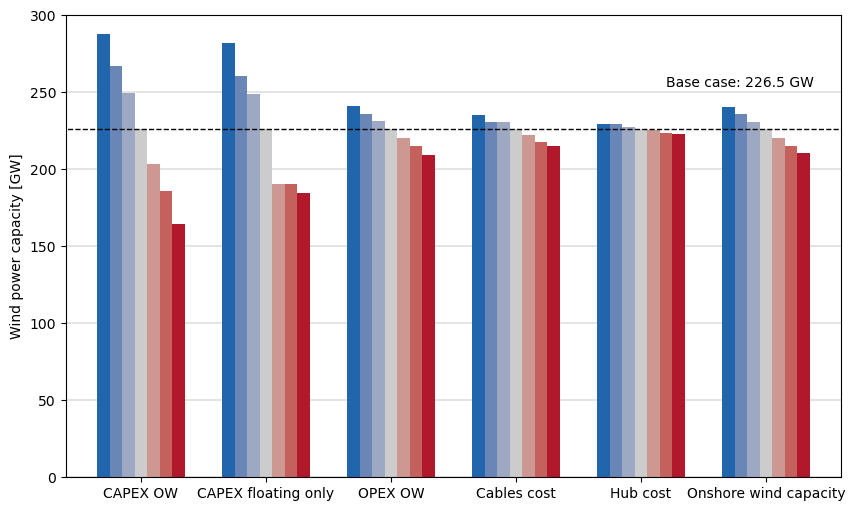

In [153]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NS.groupby(['Sensitivity', 'Case'], sort=False)['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['-30%', '-20%', '-10%', 'Base', '+10%', '+20%','+30%']

# Plot the grouped data as a bar chart
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.prop_cycle'] = cycler(color=['#2166ac', '#6a86b7', '#9da8c2', '#cccccc', '#cd9792', '#c4615c', '#b2182b'])
ax = grouped_data[case_order].plot(kind='bar', figsize=(10, 6), width=0.7)

base_GW = grouped_data["Base"]["Cap"]
n30_cap_GW = grouped_data["-30%"]["Cap"]
n30_capFloating_GW = grouped_data["-30%"]["CapFloating"]

print(f"Diff cap vs cap floating: {round(n30_cap_GW-n30_capFloating_GW)}GW; In %: {round(((n30_cap_GW-n30_capFloating_GW)/n30_cap_GW)*100-1, 1)}%")

# Customize the chart
print(f'Installed offshore wind capacity (GW) in 2050 NS - sensitivity')
ax.set_ylabel('Wind power capacity [GW]')
ax.set_xlabel(None)
ax.legend().remove()
#ax.legend(loc='upper left')
y_max=300
ax.set_ylim(0, y_max)
ax.yaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.set_axisbelow(True)
ax.set_xticklabels([SENSITIVITIES_TO_LABES[sens] for sens in SENSITIVITIES], rotation=0, fontsize=10)
ax.hlines(y=base_GW, xmin=-1, xmax=6, linewidth=1, linestyles="--", color='black')
plt.text(x=4.2, y=y_max*0.87, s=f"Base case: {round(base_GW, 1)} GW", verticalalignment='top', fontsize=10)
plt.savefig(f"SavedFigs/OW-sens-NS/Combined", bbox_inches="tight")
plt.show()

Calculate total investment cost until 2050 by scenarios

In [146]:
df_inv_NS = df_combined[df_combined["Node"].isin(WIND_FARM_NODES)]
# Exclude from 2050-2060
df_inv_NS = df_inv_NS[(df_inv_NS["Period"] != "2050-2055") & (df_inv_NS["Period"] != "2055-2060")]
grouped_inv_NS = df_inv_NS.groupby(['Sensitivity', 'Case'], sort=False)['DiscountedInvestmentCost_Euro'].sum().unstack()
grouped_inv_NS

Case,Base,+10%,+20%,+30%,-10%,-20%,-30%
Sensitivity,,,,,,,
Cap,2.662978e+11,2.482624e+11,2.311637e+11,2.061216e+11,2.809998e+11,2.804714e+11,2.773247e+11
CapFloating,2.662978e+11,2.346117e+11,2.346117e+11,2.295484e+11,2.819680e+11,2.883063e+11,3.013365e+11
Opex,2.662978e+11,2.614976e+11,2.581018e+11,2.530260e+11,2.710852e+11,2.738554e+11,2.777416e+11
Cables,2.662978e+11,2.585478e+11,2.513818e+11,2.453430e+11,2.763709e+11,2.763709e+11,2.840035e+11
HubCost,2.662978e+11,2.631492e+11,2.594322e+11,2.562291e+11,2.693505e+11,2.735044e+11,2.757691e+11
OnshrWind,2.662978e+11,2.594755e+11,2.540923e+11,2.474689e+11,2.719798e+11,2.774005e+11,2.840311e+11


In [147]:
# Cost savings capex only floating vs both
cost_CapN30 = grouped_inv_NS["-30%"]["Cap"]
cost_CapFloatingN30 = grouped_inv_NS["-30%"]["CapFloating"]

cost_diff = (cost_CapFloatingN30 - cost_CapN30) / 10**9 # in BEUR
cost_diff

24.011813300666688

#### For NO OW

In [131]:
df_ow_NO = df_ow_NS[df_ow_NS["Node"].isin(NO_NODES)]
df_ow_NO

,Node,GeneratorType,Period,genInvCap_MW,genInstalledCap_MW,genExpectedCapacityFactor,DiscountedInvestmentCost_Euro,genExpectedAnnualProduction_GWh,Sensitivity,Case
5501,NordvestA,Windoffshoregrounded,2045-2050,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Cap,Base
5509,NordvestC,Windoffshoregrounded,2045-2050,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Cap,Base
5517,VestavindA,Windoffshoregrounded,2045-2050,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Cap,Base
5525,SønnavindA,Windoffshoregrounded,2045-2050,0.000000,0.000000,0.000000,0.000000e+00,0.000000,Cap,Base
5533,SørvestC,Windoffshoregrounded,2045-2050,0.001124,8829.999981,0.466852,5.998223e+02,36111.379070,Cap,Base
...,...,...,...,...,...,...,...,...,...,...
5869,NordavindC,Windoffshorefloating,2045-2050,0.000090,0.040488,0.395892,5.687560e+01,0.140412,OnshrWind,-30%
5877,VestavindE,Windoffshorefloating,2045-2050,0.003232,0.185025,0.357710,2.043192e+03,0.579782,OnshrWind,-30%
5885,SørvestE,Windoffshorefloating,2045-2050,338.786307,5079.999394,0.499389,2.141684e+08,22223.204846,OnshrWind,-30%
5893,SørvestA,Windoffshorefloating,2045-2050,0.001865,0.007210,0.333254,1.178883e+03,0.021049,OnshrWind,-30%


Diff cap vs cap floating: 7GW; In %: 3.4%
Installed offshore wind capacity (GW) in 2050 NO - sensitivity


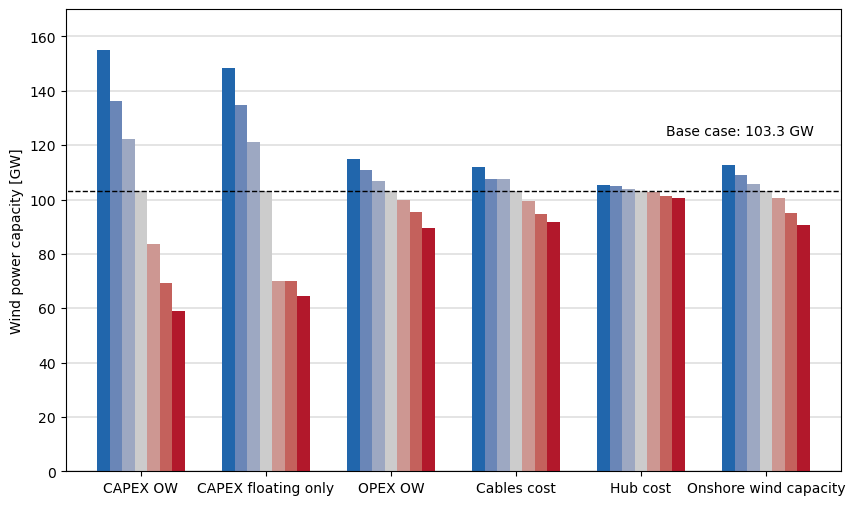

In [134]:
# Group the data by 'Period' and 'Case' and sum the 'genInstalledCap_MW' for each group
grouped_data = df_ow_NO.groupby(['Sensitivity', 'Case'], sort=False)['genInstalledCap_MW'].sum().unstack()

# Convert the summed values from MW to GW by dividing by 1000
grouped_data = grouped_data / 1000

case_order = ['-30%', '-20%', '-10%', 'Base', '+10%', '+20%','+30%']

# Plot the grouped data as a bar chart
plt.rcParams.update({'font.size': 10})
plt.rcParams['axes.prop_cycle'] = cycler(color=['#2166ac', '#6a86b7', '#9da8c2', '#cccccc', '#cd9792', '#c4615c', '#b2182b'])
ax = grouped_data[case_order].plot(kind='bar', figsize=(10, 6), width=0.7)

base_GW = grouped_data["Base"]["Cap"]
n30_cap_GW = grouped_data["-30%"]["Cap"]
n30_capFloating_GW = grouped_data["-30%"]["CapFloating"]

print(f"Diff cap vs cap floating: {round(n30_cap_GW-n30_capFloating_GW)}GW; In %: {round(((n30_cap_GW-n30_capFloating_GW)/n30_cap_GW)*100-1, 1)}%")


# Customize the chart
print(f'Installed offshore wind capacity (GW) in 2050 NO - sensitivity')
ax.set_ylabel('Wind power capacity [GW]')
ax.set_xlabel(None)
ax.legend().remove()
#ax.legend(loc='upper left')
y_max = 170
ax.set_ylim(0, y_max)
ax.yaxis.grid(color='gray', linestyle='-', lw=0.3)
ax.set_axisbelow(True)
ax.set_xticklabels([SENSITIVITIES_TO_LABES[sens] for sens in SENSITIVITIES], rotation=0, fontsize=10)
ax.hlines(y=base_GW, xmin=-1, xmax=6, linewidth=1, linestyles="--", color='black')
plt.text(x=4.2, y=y_max*0.75, s=f"Base case: {round(base_GW, 1)} GW", verticalalignment='top', fontsize=10)
plt.savefig(f"SavedFigs/OW-sens-NO/Combined", bbox_inches="tight")
plt.show()

Calculate total inv cost for different scenarios NO

In [150]:
df_inv_NO = df_combined[df_combined["Node"].isin(NO_NODES)]
# Exclude from 2050-2060
df_inv_NO = df_inv_NO[(df_inv_NO["Period"] != "2050-2055") & (df_inv_NO["Period"] != "2055-2060")]
grouped_inv_NO = df_inv_NO.groupby(['Sensitivity', 'Case'], sort=False)['DiscountedInvestmentCost_Euro'].sum().unstack()
grouped_inv_NO

Case,Base,+10%,+20%,+30%,-10%,-20%,-30%
Sensitivity,,,,,,,
Cap,1.157074e+11,9.941540e+10,8.325317e+10,7.303920e+10,1.272952e+11,1.313485e+11,1.398352e+11
CapFloating,1.157074e+11,8.792545e+10,8.792545e+10,8.299587e+10,1.263085e+11,1.346981e+11,1.436195e+11
Opex,1.157074e+11,1.135410e+11,1.099135e+11,1.042355e+11,1.177199e+11,1.208030e+11,1.236184e+11
Cables,1.157074e+11,1.106363e+11,1.039303e+11,9.932486e+10,1.215781e+11,1.215781e+11,1.285436e+11
HubCost,1.157074e+11,1.144273e+11,1.117623e+11,1.092342e+11,1.170632e+11,1.202516e+11,1.220363e+11
OnshrWind,1.157074e+11,1.119778e+11,1.063515e+11,1.003700e+11,1.197890e+11,1.242583e+11,1.288892e+11


In [152]:
# Cost savings capex only floating vs both
cost_CapN30_NO = grouped_inv_NO["-30%"]["Cap"]
cost_CapFloatingN30_NO = grouped_inv_NO["-30%"]["CapFloating"]

cost_diff_NO = (cost_CapFloatingN30_NO - cost_CapN30_NO) / 10**9 # in BEUR
cost_diff_NO

3.78426681481546

#### Change in other technologies

In [85]:
# Get total capacity for techs in given period and case
total_gen_by_sens_and_case = df_combined.groupby(['Sensitivity', 'Case', 'GeneratorType'])['genInstalledCap_MW'].sum().to_dict()

# Unique values
sensitivities = sorted(set([sens for (sens, _, _) in total_gen_by_sens_and_case.keys()]))
cases = set([case for (_, case, _) in total_gen_by_sens_and_case.keys()])
techs = set([tech for (_, _, tech) in total_gen_by_sens_and_case.keys()])

# Convert from MW to GW
total_gen_by_sens_and_case = {k: v / 1000 for k, v in total_gen_by_sens_and_case.items()}

# Create dataframe
df_rows = []
df_cols = ["Period", "Sensitivity", "Case", "Tech", "Installed capacity GW"]

for (sens, case, tech), cap in total_gen_by_sens_and_case.items():
    df_rows.append(["2045-2050", sens, case, tech, cap])

df_total_gen = pd.DataFrame(df_rows, columns=df_cols)
df_total_gen

,Period,Sensitivity,Case,Tech,Installed capacity GW
0,2045-2050,Cables,+10%,Bio,866.261749
1,2045-2050,Cables,+10%,Bio10cofiring,98.581317
2,2045-2050,Cables,+10%,Bio10cofiringCCS,0.000000
3,2045-2050,Cables,+10%,Bioexisting,109.500286
4,2045-2050,Cables,+10%,Coal,0.000191
...,...,...,...,...,...
1171,2045-2050,Opex,Base,Waste,86.628154
1172,2045-2050,Opex,Base,Wave,10.380002
1173,2045-2050,Opex,Base,Windoffshorefloating,214.042561
1174,2045-2050,Opex,Base,Windoffshoregrounded,1395.386213


Calculated diff to base for each row

In [86]:
lookup_table = df_total_gen.copy()

def diff_to_base_GW(df_row):
    sens = df_row["Sensitivity"]
    tech = df_row["Tech"]
    case = "Base"
    base_value = lookup_table[(sens == lookup_table["Sensitivity"]) & \
                              (tech == lookup_table["Tech"]) & \
                                (case == lookup_table["Case"])]["Installed capacity GW"].sum()
    
    df_row["GW base"] = round(base_value, 1)
    df_row["GW diff to base"] = round(df_row["Installed capacity GW"] - base_value, 1)

    if base_value > 0:
        df_row["GW diff to base %"] = round((df_row["Installed capacity GW"]/base_value - 1) * 100, 1)
    else:
        df_row["GW diff to base %"] = "N/A"

    df_row["Installed capacity GW"] = round(df_row["Installed capacity GW"], 1)

    return df_row

df_total_gen = df_total_gen.apply(lambda row: diff_to_base_GW(row), axis=1)

# Remove small diffs (<10 MW)
df_total_gen_sens = df_total_gen[abs(df_total_gen["GW diff to base"]) > 0.01].reset_index(drop=True)
df_total_gen_sens

,Period,Sensitivity,Case,Tech,Installed capacity GW,GW base,GW diff to base,GW diff to base %
0,2045-2050,Cables,+10%,Bio,866.3,865.3,0.9,0.1
1,2045-2050,Cables,+10%,Bio10cofiring,98.6,99.1,-0.5,-0.5
2,2045-2050,Cables,+10%,GasCCGT,1412.5,1407.0,5.5,0.4
3,2045-2050,Cables,+10%,GasOCGT,955.7,964.8,-9.1,-0.9
4,2045-2050,Cables,+10%,Hydroregulated,820.2,820.9,-0.7,-0.1
...,...,...,...,...,...,...,...,...
453,2045-2050,Opex,-30%,Solar,7765.4,7796.2,-30.8,-0.4
454,2045-2050,Opex,-30%,Waste,86.2,86.6,-0.4,-0.5
455,2045-2050,Opex,-30%,Windoffshorefloating,271.8,214.0,57.7,27.0
456,2045-2050,Opex,-30%,Windoffshoregrounded,1452.7,1395.4,57.3,4.1


Filter by period and case to look at values

In [137]:
FILTER_SENS = "CapFloating" 
FILTER_CASE = "-30%"

df_total_gen_sens_filtered = df_total_gen_sens[(df_total_gen_sens["Sensitivity"] == FILTER_SENS) & (df_total_gen_sens["Case"] == FILTER_CASE)]
df_total_gen_sens_filtered.sort_values(by=["GW diff to base"], ascending=False)

,Period,Sensitivity,Case,Tech,Installed capacity GW,GW base,GW diff to base,GW diff to base %
229,2045-2050,CapFloating,-30%,Windoffshorefloating,599.2,214.0,385.2,180.0
223,2045-2050,CapFloating,-30%,GasOCGT,983.9,964.8,19.1,2.0
225,2045-2050,CapFloating,-30%,Lignite,232.9,230.0,2.9,1.3
224,2045-2050,CapFloating,-30%,Hydroregulated,823.3,820.9,2.3,0.3
221,2045-2050,CapFloating,-30%,Bio10cofiring,99.9,99.1,0.8,0.8
228,2045-2050,CapFloating,-30%,Waste,86.2,86.6,-0.4,-0.5
222,2045-2050,CapFloating,-30%,GasCCGT,1404.8,1407.0,-2.2,-0.2
220,2045-2050,CapFloating,-30%,Bio,828.6,865.3,-36.7,-4.2
226,2045-2050,CapFloating,-30%,Nuclear,1275.0,1337.7,-62.7,-4.7
227,2045-2050,CapFloating,-30%,Solar,7710.3,7796.2,-85.8,-1.1
